In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python





In [ ]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [ ]:
train =ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory("/content/drive/MyDrive/forest_fire/Training_and_Validation",
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode='binary')
test_dataset = test.flow_from_directory("/content/drive/MyDrive/forest_fire/Testing",
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode='binary')


Found 1956 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3) , activation='relu' , input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3) , activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3) , activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3) , activation='relu' ))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512 , activation='relu'))
model.add(keras.layers.Dense(1 , activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])


In [ ]:
v=model.fit(train_dataset , epochs=10 , validation_data=test_dataset)


Epoch 1/10
62/62 [==============================] - 364s 6s/step - loss: 0.2779 - accuracy: 0.8829 - val_loss: 0.3540 - val_accuracy: 0.8088
Epoch 2/10
62/62 [==============================] - 8s 129ms/step - loss: 0.1516 - accuracy: 0.9463 - val_loss: 0.3416 - val_accuracy: 0.8529
Epoch 3/10
62/62 [==============================] - 8s 126ms/step - loss: 0.1494 - accuracy: 0.9545 - val_loss: 0.2903 - val_accuracy: 0.9118
Epoch 4/10
62/62 [==============================] - 7s 120ms/step - loss: 0.1230 - accuracy: 0.9596 - val_loss: 0.2184 - val_accuracy: 0.9412
Epoch 5/10
62/62 [==============================] - 8s 129ms/step - loss: 0.0930 - accuracy: 0.9693 - val_loss: 0.2406 - val_accuracy: 0.8824
Epoch 6/10
62/62 [==============================] - 7s 120ms/step - loss: 0.0861 - accuracy: 0.9744 - val_loss: 0.1736 - val_accuracy: 0.9559
Epoch 7/10
62/62 [==============================] - 8s 130ms/step - loss: 0.0732 - accuracy: 0.9760 - val_loss: 0.0904 - val_accuracy: 0.9853
Epoch 8

In [ ]:
predictions=model.predict(test_dataset)
predictions=np.round(predictions)
predictions


3/3 [==============================] - 0s 76ms/step


array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
def predictImage(filename):
  img1=image.load_img(filename , target_size=(150,150))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y , axis=0)
  val=model.predict(X)
  print(val)
  if val==0:
    plt.xlabel("FIRE" , fontsize=25)
  elif val==1:
    plt.xlabel("no fire" , fontsize=25)





1/1 [==============================] - 0s 339ms/step
[[5.476131e-20]]


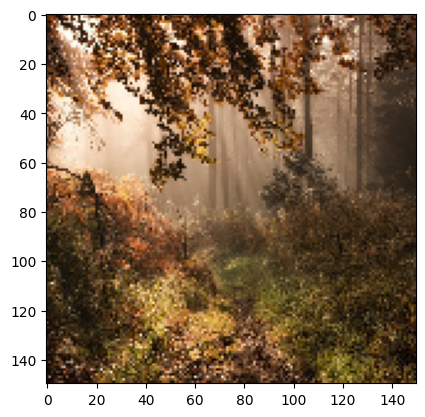

In [ ]:
predictImage("/content/drive/MyDrive/firedetection/train/non_fire_images/non_fire.103.png")

In [ ]:
model.save('model.h5')
from google.colab import files
files.download('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>